linear, bar, scatter, boxplot, pie, radar, multiple series chart and 3D charts.

### Matplot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.axes3d import get_test_data
import seaborn as sns

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)
diamonds=diamonds.drop('Unnamed: 0.1', axis=1)
diamonds=diamonds.drop('validate_z', axis=1)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,scale_clarity,scale_color
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,1,5
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,2,5
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,4,5
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,3,1
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50,2,6
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61,2,6
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56,2,6
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,1,2


In [3]:
plt.style.use("dark_background")

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
    
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.serif'] = 'Abramo'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.labelsize'] = 3
plt.rcParams['axes.titlesize'] = 3
plt.rcParams['xtick.labelsize'] = 3
plt.rcParams['ytick.labelsize'] = 3
plt.rcParams['legend.fontsize'] = 3
plt.rcParams['figure.titlesize'] = 6


<ipython-input-38-b51880de6855>:217: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


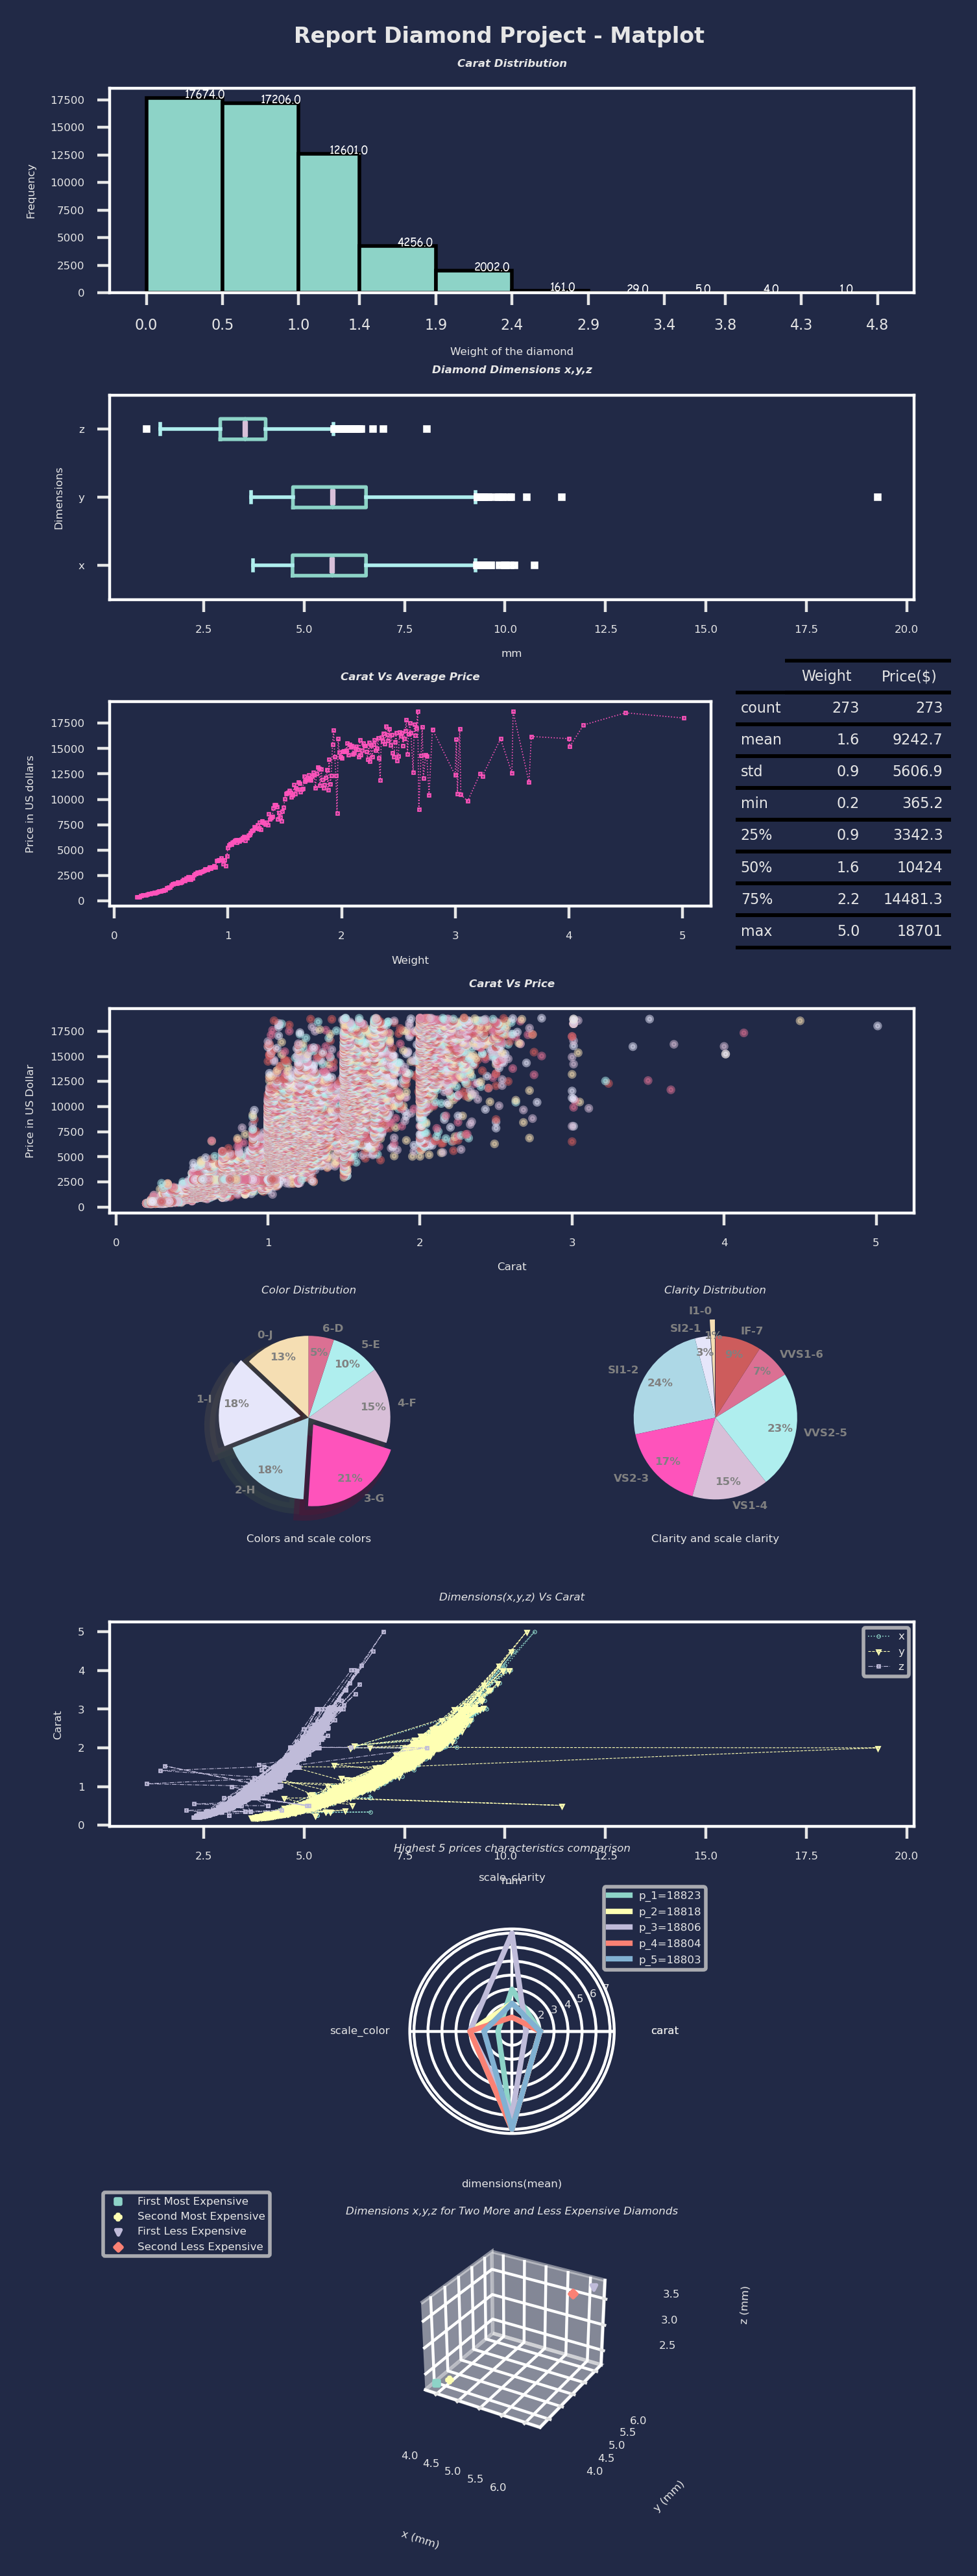

In [38]:
# Set an aspect ratio


#width, height = plt.figaspect(1.60)
fig = plt.figure(figsize=(4,12), dpi=400)
fig.suptitle("Report Diamond Project - Matplot",x=0.5,y=0.9,weight='bold')
# Carat Distribution histogram
ax1 = plt.subplot(8,8,(1,8))
xmax=diamonds['carat'].max()
xmin=diamonds['carat'].min()
sep=(diamonds['carat'].max()-diamonds['carat'].min())/10
bins=[round(i*sep,1) for i in range(0,11)]
df1=pd.DataFrame()
df1['grouped'] = pd.cut(diamonds['carat'], bins=bins)
df2=df1[['grouped']].groupby(['grouped']).agg({'grouped':'count'})

_, _, patches =ax1.hist(diamonds['carat'], bins=bins,histtype='bar', edgecolor = 'black')
for pp in patches:
   x = (pp._x0 + pp._x1)/2
   y = pp._y1 + 0.08
   plt.text(x, y, pp._y1,fontsize='3',fontfamily ='fantasy',color='white')

plt.xlabel('Weight of the diamond')
plt.ylabel('Frequency')
plt.title('Carat Distribution', fontstyle='italic',weight='bold')
plt.xticks(bins,fontsize='4')




# Dimensions
ax2=plt.subplot(8,8,(9,16))
boxprops = dict(linestyle='x', linewidth=1.5, color='thistle')
flierprops = dict(marker='s', markersize=1,
                  linestyle='none',color='thistle')
whiskerprops = dict(color='paleturquoise')
capprops = dict(color='paleturquoise')
medianprops = dict(linewidth=1.5, linestyle='-', color='thistle')
diamonds.boxplot(column=['x','y','z'],vert=False, notch=True, whiskerprops=whiskerprops,capprops=capprops, flierprops=flierprops, medianprops=medianprops,showmeans=False)

#plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4'])

plt.xlabel('mm')
plt.ylabel('Dimensions')
# Font style isn't accessible through rcParams
plt.title("Diamond Dimensions x,y,z", fontstyle='italic',weight='bold')
plt.grid(visible=False)




# price average per carat
ax3 = plt.subplot(8,8,(17,22))
d=diamonds[['price','carat']].groupby(['carat'] ,as_index=False).agg('mean')
d.sort_values('carat',ascending=False)
y_series = d['carat']
x_1 = d['price']

ax3.plot(y_series, x_1, linewidth=0.3, linestyle=':', marker='s', label='Price',markersize=0.2,color='#FE53BB')
ax3.set_title('Carat Vs Average Price',fontstyle='italic',weight='bold')
plt.xlabel('Weight')
plt.ylabel('Price in US dollars')
#plt.xticks([1,2,3,4,5], ['Oct', 'Nov', 'Dec', 'Jan', 'Feb'])


#Table price and weight describe
ax4 = plt.subplot(8,8,(24))

df=diamonds[["carat", "price"]]
dfi=df.describe()

ax4.axis('off')
tb=ax4.table(cellText=[[273, 273],
       [1.6, 9242.7],
       [0.9, 5606.9],
       [0.2, 365.2],
       [0.9, 3342.3],
       [1.6, 10424],
       [2.2, 14481.3],
       [5.0, 18701]], loc="center", colLabels=['Weight', 'Price($)'],rowLabels=dfi.index,colColours =["#FE53BB"] * 2,edges='horizontal')
tb.set_fontsize('6')
tb.scale(1.8, 0.9)



# scatter carat and prices
ax5 = plt.subplot(8,8,(25,32))
#leg=plt.legend(loc='best', numpoints=1, fancybox=True)
colors = np.random.randint(100, size=(53940))
#colors = np.array(['#08F7FE','#FE53BB','#F5D300','#00ff41','thistle','paleturquoise'])

ax5=plt.scatter(diamonds['carat'], diamonds['price'],c=8990*["wheat", "lavender",'thistle','paleturquoise','palevioletred','indianred'],alpha=0.5,s=2)#,cmap=['#08F7FE','#FE53BB','#F5D300','#00ff41','thistle','paleturquoise'],s=10)

plt.xlabel('Carat')
plt.ylabel('Price in US Dollar')
plt.title('Carat Vs Price', fontstyle='italic',weight='bold')



ax6 = plt.subplot(8,8,(33,36))


d=diamonds[['color']].groupby(['color'],as_index=False).agg({'color':'count'})
d.sort_values('color',ascending=False)
d['Percentage']=round((d['color']/d['color'].sum())*100)
lables = ["0-J", "1-I", "2-H",'3-G','4-F','5-E','6-D']
colors = ["wheat", "lavender", "lightblue",'#FE53BB','thistle','paleturquoise','palevioletred']
explode = (0, 0.1, 0,0.1,0,0,0)
ax6=plt.pie(d['Percentage'],colors=colors,labels=lables, autopct="%1.0f%%",shadow=True, startangle=90,explode=explode,textprops={'size':'3','color':'grey','weight':'bold'},wedgeprops = {'linewidth': 3},pctdistance=0.8)
plt.title("Color Distribution",fontstyle='italic')
plt.xlabel('Colors and scale colors')

# distribution pie clarity

ax7 = plt.subplot(8,8,(37,40))

d=diamonds[['clarity']].groupby(['clarity'],as_index=False).agg({'clarity':'count'})
d.sort_values('clarity',ascending=False)
d['Percentage']=round((d['clarity']/d['clarity'].sum())*100)
lables = ['I1-0','SI2-1','SI1-2','VS2-3','VS1-4','VVS2-5','VVS1-6','IF-7']
colors = ["wheat", "lavender", "lightblue",'#FE53BB','thistle','paleturquoise','palevioletred','indianred']
explode = (0.2, 0, 0,0,0,0,0,0)
ax7=plt.pie(d['Percentage'],colors=colors,labels=lables,  autopct="%1.0f%%",startangle=90,explode=explode,textprops={'size':'3','color':'grey','weight':'bold'},wedgeprops = {'linewidth': 3},pctdistance=0.8)
plt.title("Clarity Distribution",fontstyle='italic')
plt.xlabel('Clarity and scale clarity')

#multiple lines
ax9 = plt.subplot(8,8,(41,48))

ax9.plot(diamonds['x'],diamonds['carat'],linewidth=0.3,linestyle=':',marker='o',markersize=0.2, label='x')
ax9.plot(diamonds['y'],diamonds['carat'],linewidth=0.2,linestyle='--',marker='v',markersize=0.2, label='y')
ax9.plot(diamonds['z'],diamonds['carat'],linewidth=0.2,linestyle='-.', marker='s',markersize=0.2, label='z')
plt.xlabel('mm')
plt.ylabel('Carat')
plt.title("Dimensions(x,y,z) Vs Carat",fontstyle='italic')
#plt.xticks([1,2,3,4,5], ['Oct', 'Nov', 'Dec', 'Jan', 'Feb'])
'Dimensions (x,y,z) Vs Carat'
leg=plt.legend(loc='best', numpoints=1, fancybox=True)
colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41',  # matrix green
]


# Radar for 5 most expensive diamonds
ax10 = fig.add_subplot(8,8,(49,56),projection='polar')
#ax85=plt.figure()
di=diamonds.sort_values('price',ascending=False)
di['dimensions(mean)']=round((di['x']+di['x']+di['z'])/3,1)
categories=['carat','scale_clarity','scale_color','dimensions(mean)','carat']
di.iloc[:5]
p_1=[2,3,1,7]
p_1=np.concatenate((p_1,[p_1[0]]))
p_2=[2,2,3,7]
p_2=np.concatenate((p_2,[p_2[0]]))
p_3=[1,7,3,6]
p_3=np.concatenate((p_3,[p_3[0]]))
p_4=[2,1,3,7]
p_4=np.concatenate((p_4,[p_4[0]]))
p_5=[2,2,2,7]
p_5=np.concatenate((p_5,[p_5[0]]))
label_placement=np.linspace(start=0,stop=2*np.pi,num=(len(p_1)))


#plt.subplot(polar=True)
lines,labels=plt.thetagrids(np.degrees(label_placement),labels=categories)
ax10.plot(label_placement,p_1)
ax10.plot(label_placement,p_2)
ax10.plot(label_placement,p_3)
ax10.plot(label_placement,p_4)
ax10.plot(label_placement,p_5)
ax10.legend(labels=['p_1=18823','p_2=18818','p_3=18806','p_4=18804','p_5=18803'],loc=(0.95,0.8),fontsize='3')
ax10.set_title("Highest 5 prices characteristics comparison",fontstyle='italic')
 


ax11 = fig.add_subplot(8,8,(57,64), projection='3d')

di=diamonds.sort_values('price',ascending=False)

x = di['x'][1]
y = di['y'][1]
z = di['z'][1]
x2 = di['x'][2]
y2 = di['y'][2]
z2 = di['z'][2]
x3 = di['x'][53938]
y3 = di['y'][53938]
z3 = di['z'][53938]
x4 = di['x'][53939]
y4 = di['y'][53939]
z4 = di['z'][53939]
ax11.scatter(x,y,z,marker='s',s=2,label='First Most Expensive')
ax11.scatter(x2,y2,z2,marker='P',s=2,label='Second Most Expensive')
ax11.scatter(x3,y3,z3,marker='v',s=2,label='First Less Expensive')
ax11.scatter(x4,y4,z4,marker='D',s=2,label='Second Less Expensive')
ax11.legend(loc=(-1.5,0.9),fontsize='3')

ax11.set_title("Dimensions x,y,z for Two More and Less Expensive Diamonds",fontstyle='italic')

ax11.set_xlabel("x (mm)")

ax11.set_ylabel("y (mm)")

ax11.set_zlabel("z (mm)")
ax11.axis('tight')




# Space plots a bit

plt.subplots_adjust(hspace=0.5, wspace=0.1)
plt.axis('tight')
plt.tight_layout()
plt.savefig('Matplotlib_AC.png',bbox_inches='tight')





## Seaborn

In [17]:
di.shape

(53940, 12)

/Users/anak/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


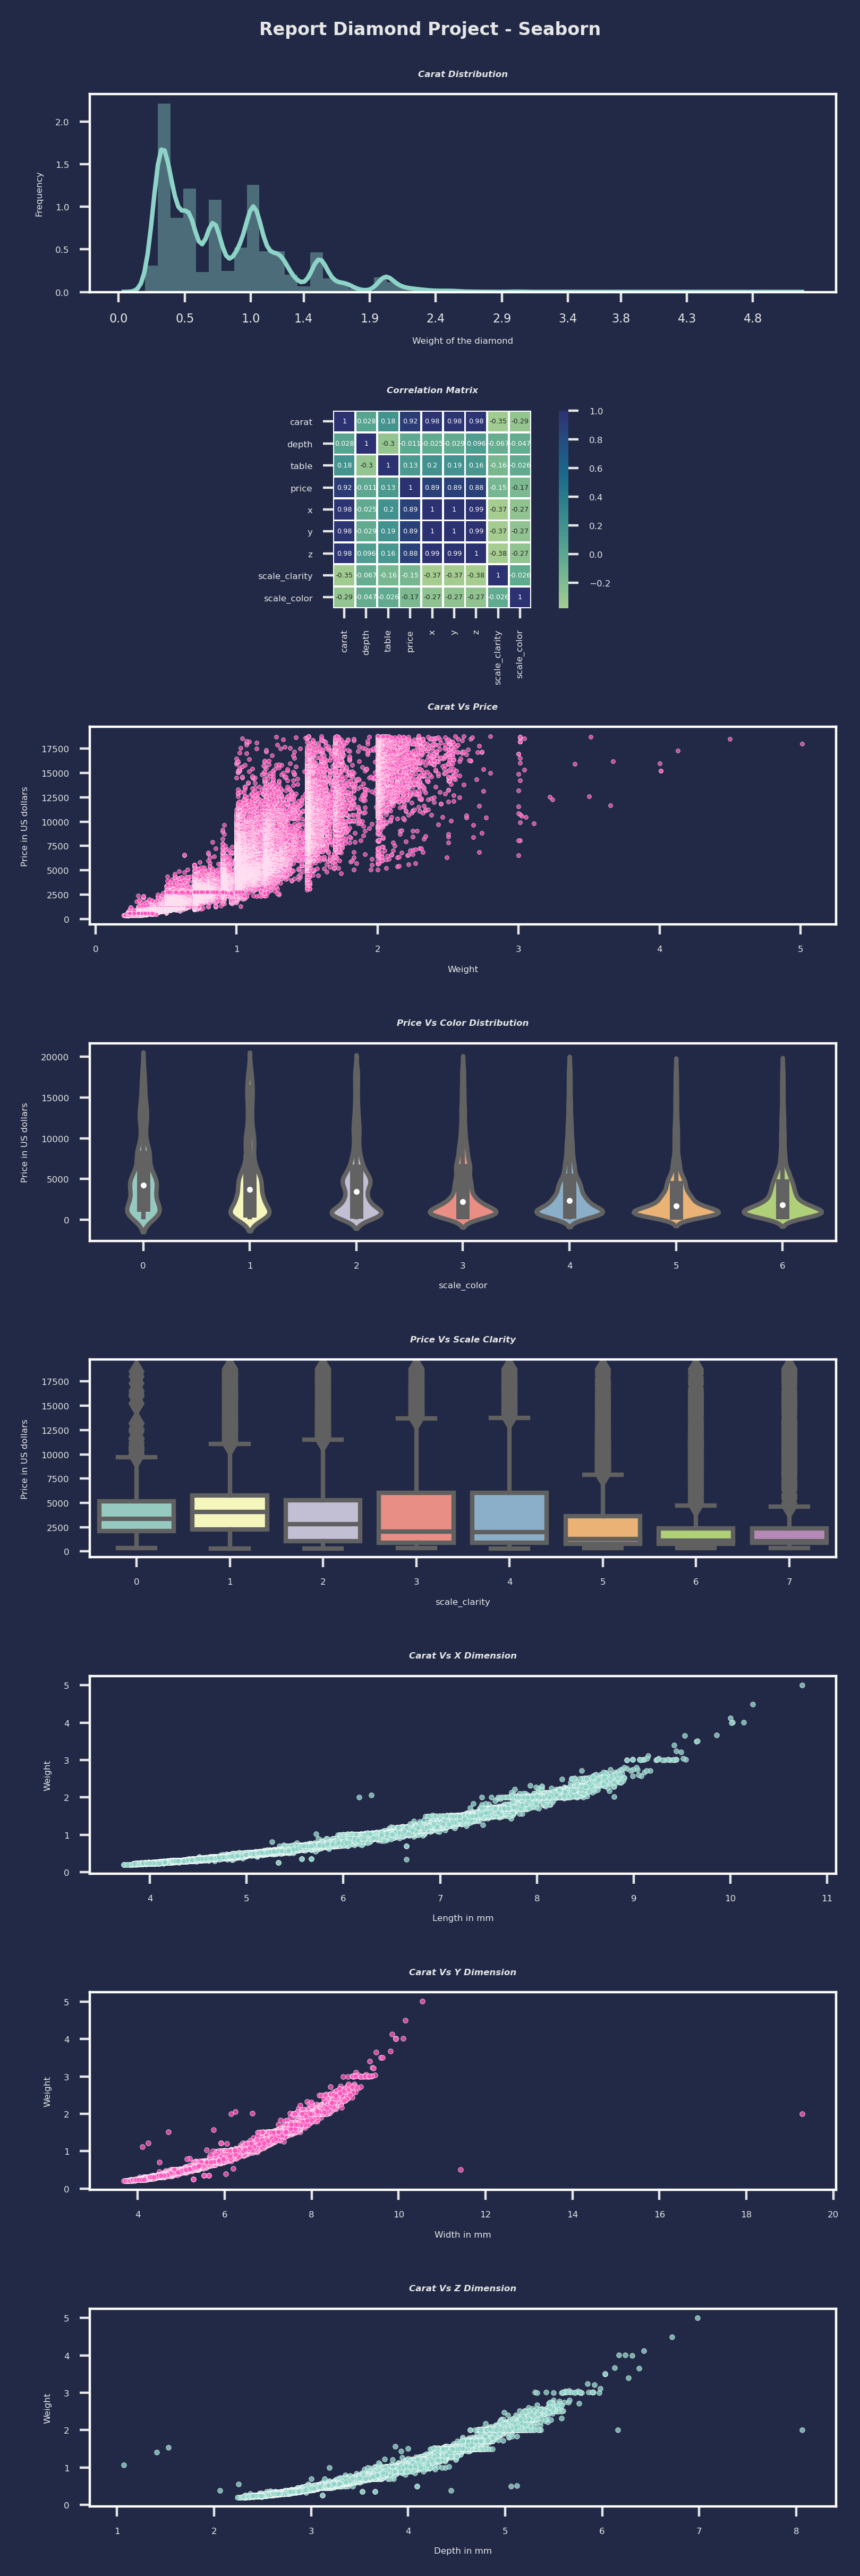

In [35]:
# Set an aspect ratio
#width, height =[15, 30]
#fig = plt.figure(figsize=(width,height), dpi=400)
#width, height = plt.figaspect(1.60)
fig = plt.figure(figsize=(4,12), dpi=400)
fig.suptitle("Report Diamond Project - Seaborn",x=0.5,y=1,weight='bold')


# Carat Distribution histogram
plt.subplot(8,8,(1,8))
sns.distplot(diamonds['carat'])
plt.xlabel('Weight of the diamond')
plt.ylabel('Frequency')
plt.title('Carat Distribution', fontstyle='italic',weight='bold')
plt.xticks(bins,fontsize='4')



plt.subplot(8,8,(9,14))
# Dimensions
sns.heatmap(diamonds.corr(), annot=True, square=True,linewidths=.5,cmap="crest",annot_kws={"size": 2.3})
plt.title('Correlation Matrix',fontstyle='italic',weight='bold')


plt.subplot(8,8,(17,24))

sns.scatterplot(data=diamonds,x="carat", y="price",alpha=0.8,s=2,color='#FE53BB')
plt.title('Carat Vs Price',fontstyle='italic',weight='bold')
plt.xlabel('Weight')
plt.ylabel('Price in US dollars')

#plt.xticks([1,2,3,4,5], ['Oct', 'Nov', 'Dec', 'Jan', 'Feb'])

plt.subplot(8,8,(25,32))
plt.title('Price Vs Color Distribution',fontstyle='italic',weight='bold')
sns.violinplot(x=diamonds["scale_color"],y=diamonds["price"])
plt.ylabel('Price in US dollars')

plt.subplot(8,8,(33,40))

plt.title('Price Vs Scale Clarity',fontstyle='italic',weight='bold')
sns.boxplot(x="scale_clarity", y="price",data=diamonds)
plt.ylabel('Price in US dollars')

plt.subplot(8,8,(41,48))

plt.title('Carat Vs X Dimension',fontstyle='italic',weight='bold')
sns.scatterplot(x="x", y="carat", data=diamonds,palette="deep",alpha=0.8,s=3)
plt.xlabel('Length in mm')
plt.ylabel('Weight')

plt.subplot(8,8,(49,56))
plt.title('Carat Vs Y Dimension',fontstyle='italic',weight='bold')
sns.scatterplot(x="y", y="carat", data=diamonds,palette="deep",alpha=0.8,s=3,color='#FE53BB')
plt.xlabel('Width in mm')
plt.ylabel('Weight')

plt.subplot(8,8,(57,64))
plt.title('Carat Vs Z Dimension',fontstyle='italic',weight='bold')
sns.scatterplot(x="z", y="carat", data=diamonds,palette="deep",alpha=0.8,s=3)
plt.xlabel('Depth in mm')
plt.ylabel('Weight')

plt.axis('tight')
plt.tight_layout()
plt.subplots_adjust(hspace=0.6, wspace=0.5)
plt.savefig('Seaborn_AC.png',bbox_inches='tight')
#Table price and weight describe
